In [1]:
# inventory, item stock, prediction for inventory
# f.e. next month how we will sell from each item

# top most selling products
# top most high selling products

# classes -> per order, also calculating total order, and there I can also add shipping?
# These are the two values that are more weird -df.sort_values(by='Quantity', ascending=False).head(2)

# with nlp find category of items?
# clustr clients to wholesale and retail?

# Importing libraries and cleaned dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

**Original Dataset**:

Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/352/online+retail

In [4]:
file_path = '../data/data_cleaned.csv'
df = pd.read_csv(file_path, dtype={'InvoiceNo': 'O','StockCode': 'O','Description': 'O',
                                   'Quantity': 'int64','UnitPrice': 'float64',
                                   'CustomerID': 'Int64','Country': 'O'}, parse_dates=['InvoiceDate'])

# EDA

In [6]:
# Filtering out the data that are not for products (shipping, bank fees etc)
df = df[df.StockCode != 'OTHER']

In [7]:
# Total number of clients
df.CustomerID.nunique()

4335

### Majority of clients and orders are from UK

In [8]:
# Countried with the highest count of (distinct) invoices
df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

Country
United Kingdom          17912
Germany                   443
France                    382
Ireland                   282
Belgium                    98
Netherlands                93
Spain                      88
Australia                  56
Switzerland                50
Portugal                   50
Finland                    40
Italy                      35
Sweden                     34
Norway                     32
Channel Islands            25
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     14
Unspecified                13
Israel                      8
Iceland                     7
Hong Kong                   7
USA                         5
Malta                       5
Canada                      5
Greece                      5
Lithuania                   4
Singapore                   4
European Community          3
Bahrain                     3
Czech Republic              2
Un

In [23]:
# Countried with the highest sum or order value
df.groupby('Country')['UnitPrice'].sum().round(2).sort_values(ascending=False).head()

Country
United Kingdom    1340421.95
Ireland             26850.75
Germany             24044.29
France              21741.24
Spain                7798.75
Name: UnitPrice, dtype: float64

In [24]:
# Countried with the highest count of (distinct) clients
df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

Country
United Kingdom    3917
Germany             94
France              87
Spain               30
Belgium             25
Name: CustomerID, dtype: int64

### Total orders value

In [11]:
# Calculating item-wise total price 
df['TotalValue'] = df.Quantity * df.UnitPrice

In [12]:
# New dataframe per order
orders = df.groupby('InvoiceNo')['Quantity'].sum().reset_index()
orders = pd.merge(orders, df.groupby('InvoiceNo')['TotalValue'].sum().reset_index()[['InvoiceNo','TotalValue']], how='left', on='InvoiceNo')
orders

,InvoiceNo,Quantity,TotalValue
0,536365,40,168.10
1,536366,12,23.70
2,536367,83,289.81
3,536368,15,70.05
4,536369,3,17.85
...,...,...,...
19779,581583,76,141.60
19780,581584,120,128.88
19781,581585,278,336.49
19782,581586,66,427.90


<Axes: xlabel='TotalValue', ylabel='Count'>

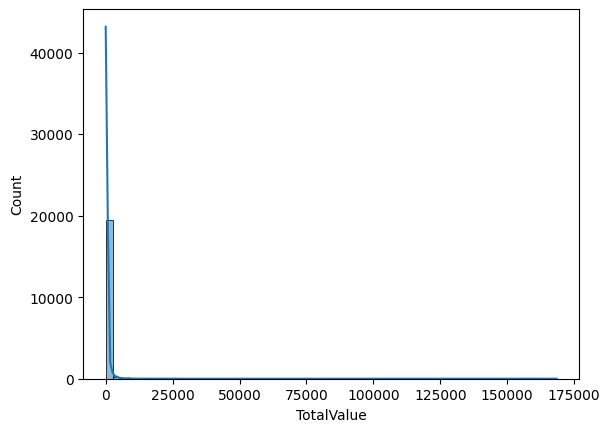

In [13]:
sns.histplot(orders['TotalValue'], kde=True, bins=60)

In [20]:
# I am removing the two main outliers I have spotted in 01_InitialExploration and
# with the diagram below it looks a bit better
orders_fltrd = orders[~orders.InvoiceNo.isin(['581483','541431'])]
orders_fltrd

,InvoiceNo,Quantity,TotalValue
0,536365,40,168.10
1,536366,12,23.70
2,536367,83,289.81
3,536368,15,70.05
4,536369,3,17.85
...,...,...,...
19779,581583,76,141.60
19780,581584,120,128.88
19781,581585,278,336.49
19782,581586,66,427.90


<Axes: xlabel='TotalValue', ylabel='Count'>

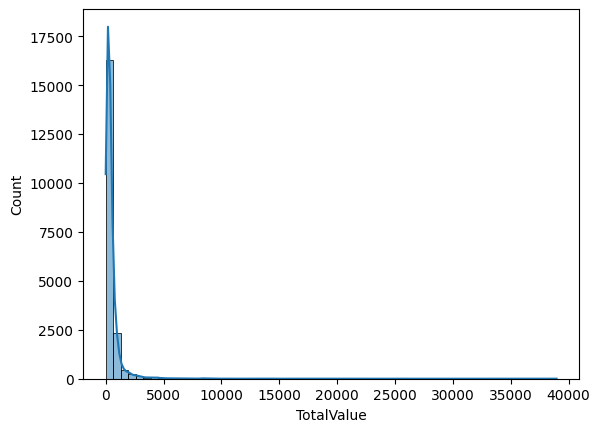

In [19]:
sns.histplot(orders_fltrd['TotalValue'], kde=True, bins=60)

<Axes: ylabel='TotalValue'>

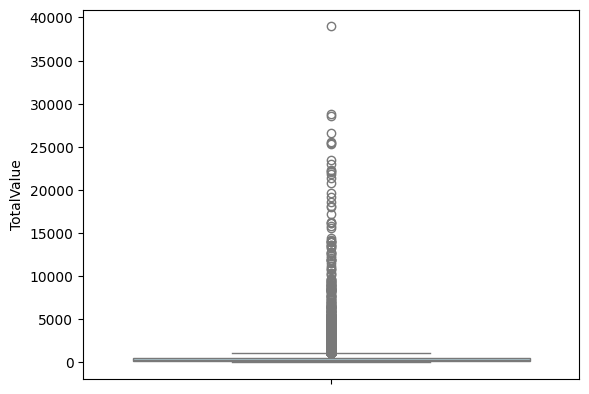

In [22]:
sns.boxplot(data = orders_fltrd['TotalValue'], color="lightblue") # there are many outliers

### Average order quantity per client

In [26]:
orders_fltrd

,InvoiceNo,Quantity,TotalValue
0,536365,40,168.10
1,536366,12,23.70
2,536367,83,289.81
3,536368,15,70.05
4,536369,3,17.85
...,...,...,...
19779,581583,76,141.60
19780,581584,120,128.88
19781,581585,278,336.49
19782,581586,66,427.90


In [45]:
customers = df.dropna(subset='CustomerID')
customers = customers[~customers.InvoiceNo.isin(['581483','541431'])]

In [46]:
customers = customers.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().reset_index()
customers = customers.groupby('CustomerID')['Quantity'].mean().sort_values(ascending=True).reset_index()
customers

,CustomerID,Quantity
0,12789,1.0
1,16257,1.0
2,14792,1.0
3,13452,1.0
4,16349,1.0
...,...,...
4329,14609,1756.5
4330,16308,2000.0
4331,16754,2140.0
4332,18087,3906.0


In [49]:
customers.Quantity.describe()

count    4334.000000
mean       24.063085
std       122.315718
min         1.000000
25%         6.233636
50%        10.188737
75%        15.395834
max      4300.000000
Name: Quantity, dtype: float64

<Axes: xlabel='Quantity', ylabel='Count'>

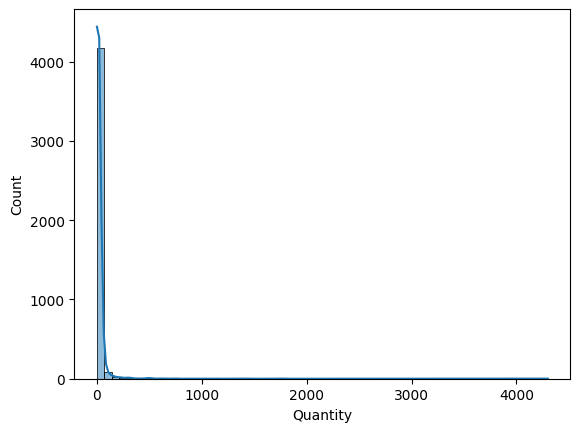

In [47]:
sns.histplot(customers['Quantity'], kde=True, bins=60)

<Axes: ylabel='Quantity'>

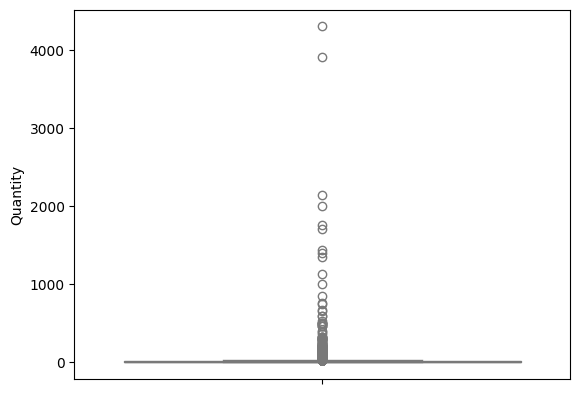

In [48]:
sns.boxplot(data = customers['Quantity'], color="lightblue")

### Distribution of variables

In [17]:
'''
skewness_price = df['SalePrice'].skew()
kurtosis_price = df['SalePrice'].kurtosis()

skewness_price, kurtosis_price
'''

"\nskewness_price = df['SalePrice'].skew()\nkurtosis_price = df['SalePrice'].kurtosis()\n\nskewness_price, kurtosis_price\n"

*from previous lesson:*

Insights:

Skewness: The positive value of skewness (1.88) for the 'SalePrice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of houses that are sold at higher prices, which are acting as outliers and pulling the mean upwards.

Kurtosis: The kurtosis value of 6.54 is greater than 3, which indicates that the 'SalePrice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'SalePrice' than one would expect in a normally distributed set.

The skewness and kurtosis values suggest that there are some houses that are sold at significantly higher prices than the majority, and these are affecting the overall distribution of house prices in the dataset.

In [18]:
# sns.histplot(df['SalePrice'], kde=True, bins=30, color="salmon")

In [19]:
# do that for price and date!

# Creating histograms for each numerical column in 'df_numerical'
#df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

# Retail vs Wholesale?

# Item Category?

# Line plot

In [20]:
# Connects individual data points with lines. A line plot is particularly useful for visualizing data over time.

In [21]:
'''
# Plotting a line graph to visualize the trend of average 'SalePrice' across different 'YearBuilt'
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='YearBuilt', y='SalePrice', errorbar=None)
plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
'''

"\n# Plotting a line graph to visualize the trend of average 'SalePrice' across different 'YearBuilt'\nplt.figure(figsize=(14, 7))\nsns.lineplot(data=df, x='YearBuilt', y='SalePrice', errorbar=None)\nplt.title('Average Sale Price over Years of Construction')\nplt.grid(True, which='both', linestyle='--', linewidth=0.5)\n"

# QQ Plot (???)

In [22]:
# ???
# The Quantile-Quantile (QQ) plot is a graphical tool to help us assess if a dataset follows a particular theoretical distribution.
# from lesson 2.EDA-bivariate

# not sure if it is needed here

# Converting continuous to discrete variables: Discretization (???)

*from previous lesson:*

Discretization is the process of converting continuous variables into discrete ones by creating a set of contiguous intervals (or bins) and then categorizing the variables into these intervals. This can be particularly useful when you want to categorize a continuous variable into different groups based on ranges. Note that we usually lose information in this process.

For our dataset, let's take the 'SalePrice' column, which is continuous, and discretize it into categories like 'Low', 'Medium', 'High', and 'Very High'.

In [23]:
'''
# Discretizing 'SalePrice' into 4 categories
bins = [0, 100000, 200000, 300000, df['SalePrice'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['SalePrice_category'] = pd.cut(df['SalePrice'], bins=bins, labels=labels, include_lowest=True)

# testing for myself what it means/ produces
df.groupby("SalePrice_category", observed=False)["SalePrice"].mean()
'''

'\n# Discretizing \'SalePrice\' into 4 categories\nbins = [0, 100000, 200000, 300000, df[\'SalePrice\'].max()]\nlabels = [\'Low\', \'Medium\', \'High\', \'Very High\']\ndf[\'SalePrice_category\'] = pd.cut(df[\'SalePrice\'], bins=bins, labels=labels, include_lowest=True)\n\n# testing for myself what it means/ produces\ndf.groupby("SalePrice_category", observed=False)["SalePrice"].mean()\n'

# Transform to normal distribution?

In [24]:
# do I need to transform data to get better prediction results ??
# lesson week 5, day 5

# Average order Quantity per client

In [103]:
test = df[df.Country == 'United Kingdom']
test = test[~test.StockCode.str.contains('SHIPPING')]
test = test.dropna(subset='CustomerID')
test_q = test.groupby('CustomerID')['Quantity'].mean().reset_index()
test_q.Quantity.describe()

count    3916.000000
mean       22.556381
std       125.401497
min         1.000000
25%         5.593970
50%         9.786797
75%        14.648153
max      4300.000000
Name: Quantity, dtype: float64

In [104]:
df = df[~df.InvoiceNo.isin([581483,541431])]

In [105]:
test_q = df.groupby('CustomerID')['Quantity'].mean().sort_values(ascending=True).reset_index()
test_q.Quantity.describe()

count    4334.000000
mean       22.236908
std       120.091275
min         1.000000
25%         6.038194
50%        10.000000
75%        14.666667
max      4300.000000
Name: Quantity, dtype: float64

In [106]:
test_q

,CustomerID,Quantity
0,16446,1.0
1,12789,1.0
2,16349,1.0
3,16257,1.0
4,17956,1.0
...,...,...
4329,15749,1802.8
4330,16308,2000.0
4331,16754,2140.0
4332,18087,3906.0


In [107]:
test_q.quantile(0.95)

CustomerID    17984.35
Quantity          48.0
Name: 0.95, dtype: Float64

In [108]:
cust_list_95 = test_q[test_q.Quantity < 48.0].CustomerID.tolist()
cust_list_05 = test_q[test_q.Quantity >= 48.0].CustomerID.tolist()
#test_q.quantile(0.97).Quantity
print(len(cust_list_95))
print(len(cust_list_05))

4113
221


In [109]:
df['TotalPrice'] = df.Quantity * df.UnitPrice

In [110]:
df[df.CustomerID.isin(cust_list_95)].Quantity.sum()

3565196

In [111]:
df[df.CustomerID.isin(cust_list_95)].TotalPrice.sum()

6302905.764

In [112]:
df[~df.CustomerID.isin(cust_list_95)].Quantity.sum()

1845024

In [113]:
df[~df.CustomerID.isin(cust_list_95)].TotalPrice.sum()

3990912.8200000008

from the above I see that there is value in seperating the customers in wholesale/ retail, cause I see that 95% of the customer have 48 in total Quantity, and 5% above. And that 95% only has approximately double the Quantity number and Total Price in comparison with the 5% group!
That shows that there seems to be two main cluster of clients, that also have quite different ordering behaviour, the retail ones and the wholesale ones.

In [114]:
test_qq = test.groupby('CustomerID')[['Quantity','TotalPrice']].sum().reset_index()
test_qq

,CustomerID,Quantity,TotalPrice
0,12747,1275,4196.01
1,12748,25051,31650.78
2,12749,1471,4090.88
3,12820,722,942.34
4,12821,70,92.72
...,...,...,...
3911,18280,45,180.60
3912,18281,54,80.82
3913,18282,103,178.05
3914,18283,1355,2039.58


<Axes: xlabel='Quantity', ylabel='TotalPrice'>

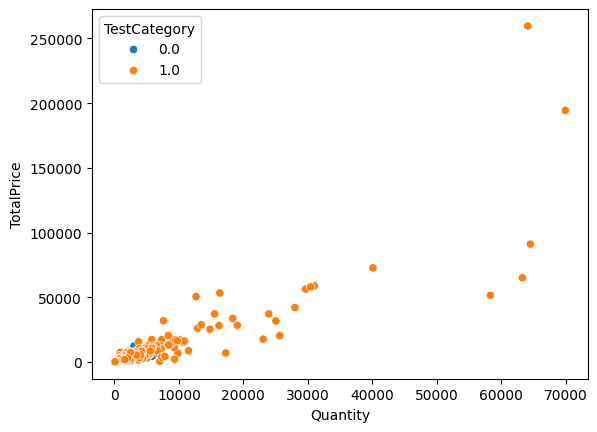

In [116]:
sns.scatterplot(data=test_qq, x='Quantity', y='TotalPrice', hue='TestCategory')

In [121]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

# with taking out outliers?

In [128]:
df.shape[0]

524554

In [131]:
df = df[~df.Quantity.isin(tukeys_test_outliers(df.Quantity))]

In [132]:
df.shape[0]

497467

In [133]:
df = df[~df.TotalPrice.isin(tukeys_test_outliers(df.TotalPrice))]

In [134]:
df.shape[0]

472695

<Axes: xlabel='Quantity', ylabel='TotalPrice'>

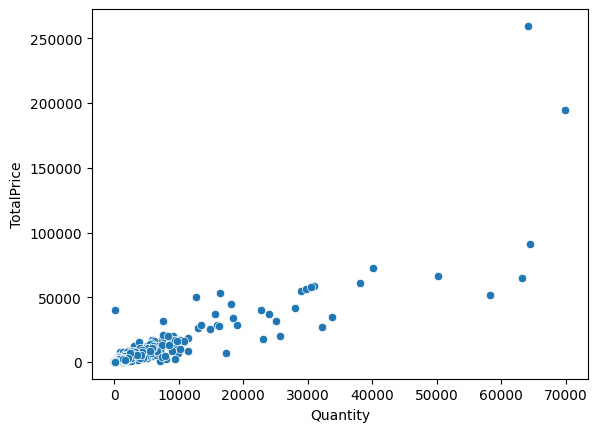

In [136]:
sns.scatterplot(data=test_qq, x='Quantity', y='TotalPrice')

Total Quantity: As you mentioned, wholesale customers are likely to purchase larger quantities of items compared to retail customers. You can use the total quantity purchased by each customer as a feature.

Total Price: Wholesale customers typically spend more money on their purchases compared to retail customers. Using the total price of orders can help distinguish between the two groups.

Average Quantity per Item: Calculate the average quantity per item for each customer. Wholesale customers may buy multiples of the same item in a single order, leading to a higher average quantity per item.

Frequency of Orders: Wholesale customers are likely to place orders more frequently than retail customers. Calculate the frequency of orders for each customer over a given time period.


Once you have selected the parameters, you can use clustering algorithms such as K-means, DBSCAN, or hierarchical clustering 

In [ ]:
# inertia - for clustering K-means
# Silhouette
# error metrics dffererent per model

# hdbscan check!

In [139]:
test_2 = test.groupby('CustomerID')[['Quantity','TotalPrice']].sum().reset_index()
test_2

,CustomerID,Quantity,TotalPrice
0,12747,1275,4196.01
1,12748,25051,31650.78
2,12749,1471,4090.88
3,12820,722,942.34
4,12821,70,92.72
...,...,...,...
3911,18280,45,180.60
3912,18281,54,80.82
3913,18282,103,178.05
3914,18283,1355,2039.58


<Axes: xlabel='TotalPrice', ylabel='Count'>

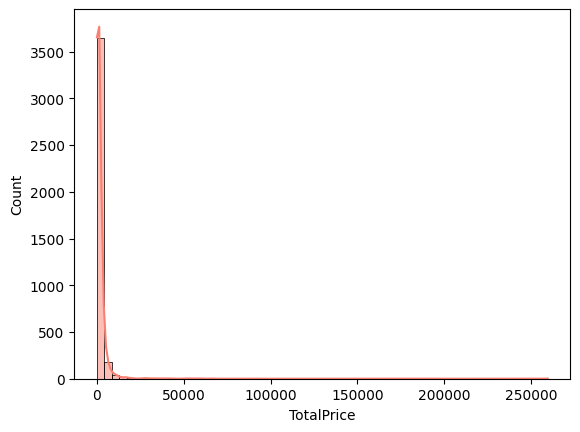

In [141]:
sns.histplot(test_2['TotalPrice'], kde=True, bins=60, color="salmon")

<Axes: xlabel='Quantity', ylabel='Count'>

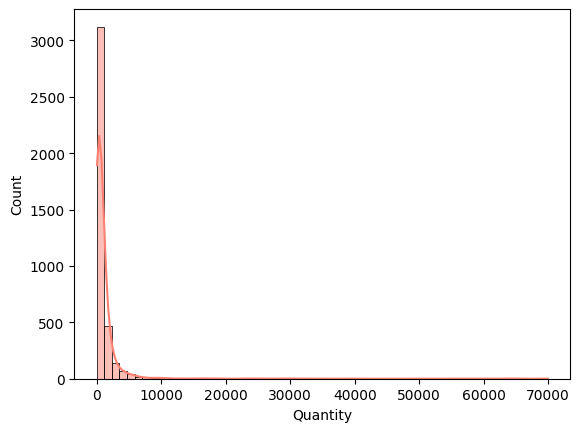

In [142]:
sns.histplot(test_2['Quantity'], kde=True, bins=60, color="salmon")

In [138]:
# can i use dbscan together with some transformation? something that is not sensitive too much to outliers?